# Create a mean spider shape for each species
> 2024-10-02 



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

full_spider_csv = pd.read_csv("../data/2024-10-01-FullSpiders.csv")


## Get the marker names from the header row

In [ ]:

marker_names = full_spider_csv.columns.tolist()
marker_names = [name for name in marker_names if name.endswith("_x") or name.endswith("_y") or name.endswith("_z")]


print(marker_names)

## Put measurements into metres

In [7]:
# Change to metres
full_spider_csv[marker_names] = full_spider_csv[marker_names] / 1000


## Get the mean shape for each species

In [8]:
mean_spider_csv = full_spider_csv.groupby("species")[marker_names].mean()

# Save the different species each to a different file. 
for species in mean_spider_csv.index.unique():
    species_data = mean_spider_csv.loc[species]
    # We want to save this with all the columns names as the first row (rather than a series)
    # Convert the series to a DataFrame with a single row
    species_df = pd.DataFrame(species_data).transpose()
    # Save the DataFrame to CSV with column names as the first row
    species_df.to_csv(f"../data/mean_spider_shape_{species}.csv", index=False)

# Display the first few rows of the last processed species data
species_df.head()

,claw1_x,claw1_y,claw1_z,tibiametatarsus1_x,tibiametatarsus1_y,tibiametatarsus1_z,patella1_x,patella1_y,patella1_z,coxa1_x,...,center_z,clypeus_x,clypeus_y,clypeus_z,pedicel_x,pedicel_y,pedicel_z,spinneret_x,spinneret_y,spinneret_z
tuscon,0.026032,-0.006478,0.000822,0.019487,-0.004725,0.002647,0.012385,-0.003267,0.003752,0.006285,...,0.0,0.008432,0.000304,0.001983,-4.727496e-08,3.351677e-07,-5.970461e-07,-0.012545,-0.000223,-0.003168


### Bonus: Plot the variation in shape for each individual

/var/folders/2m/t5bb62r50jbb_r1gf5dsdy680000gr/T/ipykernel_4286/1370050039.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/2m/t5bb62r50jbb_r1gf5dsdy680000gr/T/ipykernel_4286/1370050039.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/2m/t5bb62r50jbb_r1gf5dsdy680000gr/T/ipykernel_4286/1370050039.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


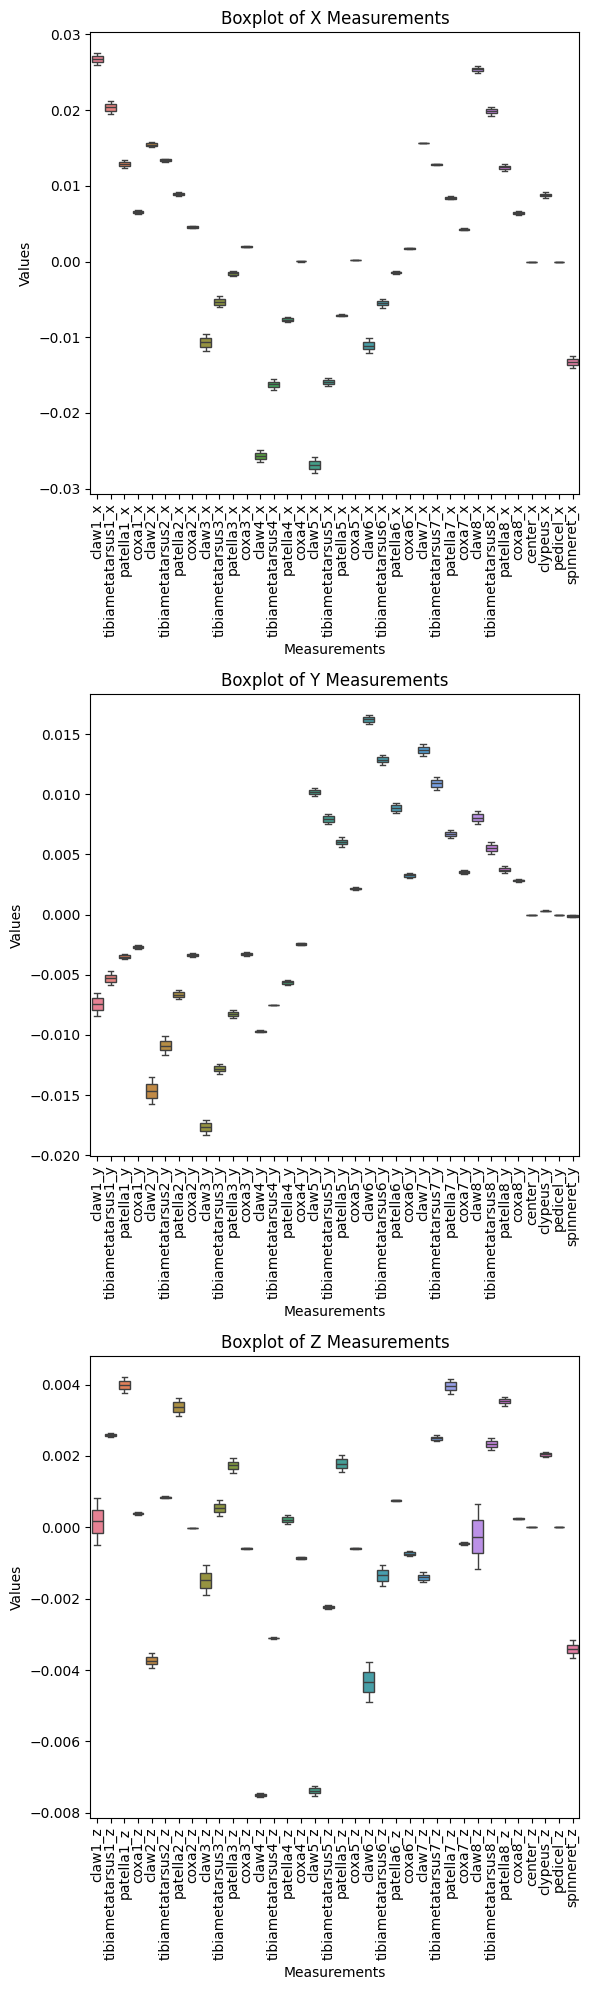

In [9]:

# Create a figure with three subplots in a row
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 20))

# Function to plot boxplot for specific suffix
def plot_boxplot(ax, data, suffix, title):
    columns = [col for col in data.columns if col.endswith(suffix)]
    sns.boxplot(data=data[columns], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel('Measurements')
    ax.set_ylabel('Values')
    ax.set_title(title)

# Plot for _x columns
plot_boxplot(ax1, mean_spider_csv, '_x', 'Boxplot of X Measurements')

# Plot for _y columns
plot_boxplot(ax2, mean_spider_csv, '_y', 'Boxplot of Y Measurements')

# Plot for _z columns
plot_boxplot(ax3, mean_spider_csv, '_z', 'Boxplot of Z Measurements')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
